I have always been a big fan of city bike sharing services. I use the 'Bicing' service in Barcelona and I think it's an immensely practical way of getting around a modern city. While the data set released by the 'Bicing' service is less than impressive, I see that the DC bike share program has put out a rather clean data set which could be useful to visualize a few interesting trends. This data set is fairly old now, but I doubt human behavior in urban settings has changed significantly in the last couple of years. Any conclusions that we might draw from this must essentially hold, at least for the DC area, and to a lesser extent, other cities (think different weather patterns, mobility cultures, etc.).  

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

sampleSubmission.csv
test.csv
train.csv



A couple more imports to help us plot data

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Now, lets import the data, change the index to 'datetime' and tell python to process the index as a date time object. 

In [3]:
data = pd.read_csv("../input/train.csv", index_col = 'datetime', parse_dates = True)
data.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


The describe method gives us a nice little summary of our data. We see for instance that the mean temperature in DC area is 20° C (the max is 41!), the biking service is used a 192 times every hour on an average and so on...

Now, lets see how the bike usage changes across seasons. Clearly, the warmer months should have a higher usage. We will plot the average temperatures from each season to see it alongside the corresponding bike usage. We can also split the user base into casual and registered users to see if there are any differences in  behavior patterns. Perhaps, registered users remain committed even in the colder seasons as they are likely to be using the bikes for their daily commute?  

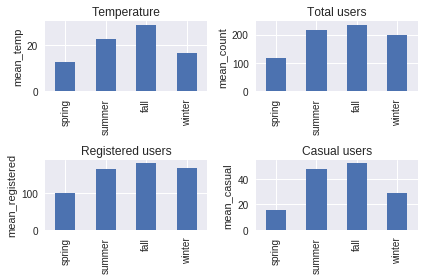

In [5]:
by_season = data.groupby('season').mean()
by_season.index = ['spring', 'summer', 'fall', 'winter']
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 2)
by_season['count'].plot(kind = 'bar')
ax1.set_ylabel('mean_count')
ax1.set_title('Total users')
ax2 = fig.add_subplot(2, 2, 1)
by_season['temp'].plot(kind = 'bar')
ax2.set_ylabel('mean_temp')
ax2.set_title('Temperature')
ax3 = fig.add_subplot(2, 2, 3)
by_season['registered'].plot(kind = 'bar')
ax3.set_ylabel('mean_registered')
ax3.set_title('Registered users')
ax4 = fig.add_subplot(2, 2, 4)
by_season['casual'].plot(kind = 'bar')
ax4.set_ylabel('mean_casual')
ax4.set_title('Casual users')
plt.tight_layout()
plt.show()

The first thing we notice of course is that there are more users in fall and summer as compared to spring and winter. At first I was surprised that winter months have more users than in spring, but plotting the temperatures, we see that the way seasons are defined in this data set, the average temperature in spring is actually lower than in winter. We also see that the registered users do remain more committed to their biking habits in the colder months, just as we expected. Now since our hypothesis is that the registered users are using the service for their commutes, we should be able to visualize this data by plotting the hourly use.  

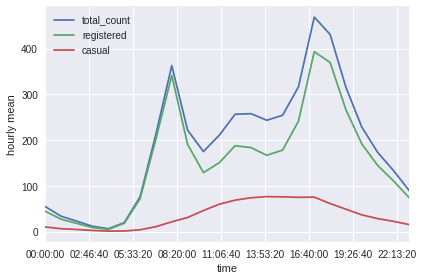

In [6]:

by_time = data.groupby(data.index.time).mean()
fig2 = plt.figure()
ax = fig2.add_subplot(1,1,1)
by_time['count'].plot(label = 'total_count')
by_time['registered'].plot(label = 'registered')
by_time['casual'].plot(label = 'casual')
ax.set_ylabel('hourly mean')
ax.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

With registered users, we clearly see the double peak structure corresponding to the commutes to and back from work. There is also slightly higher usage on the way back, rather than on the way in. 
Plotting the data over weekdays should give us a drop off in the registered users as they are mostly using the service for their commute to work...  

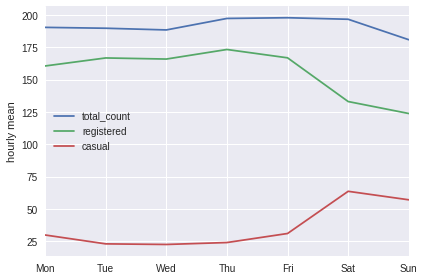

In [7]:

by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
fig3 = plt.figure()
ax = fig3.add_subplot(1,1,1)
by_weekday['count'].plot(label = 'total_count')
by_weekday['registered'].plot(label = 'registered')
by_weekday['casual'].plot(label = 'casual')
ax.set_ylabel('hourly mean')
ax.legend(loc = 'best')
plt.tight_layout()
plt.show()

Voila! 

One other classification that the data set provides is 'weather' which essentially describes what kind of a day it was(sunny, rainy etc.). This classification is a little weird as heavy rain for one hour during the day presumably results in a very different behavior from a day when it pours all day, and yet I assume that the days are classified the same. 

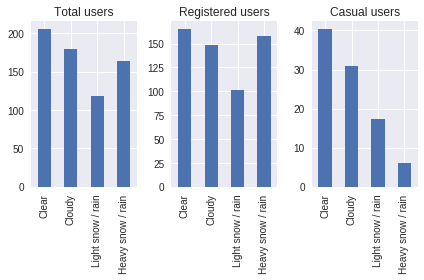

In [8]:
by_daytype = data.groupby('weather').mean()
by_daytype.index = ['Clear', 'Cloudy', 'Light snow / rain', 'Heavy snow / rain']
fig4 = plt.figure()
ax1 = fig4.add_subplot(1,3,1)
by_daytype['count'].plot(kind = 'bar')
ax1.set_title('Total users')
ax2 = fig4.add_subplot(1,3,2)
by_daytype['registered'].plot(kind = 'bar')
ax2.set_title('Registered users')
ax3 = fig4.add_subplot(1,3,3)
by_daytype['casual'].plot(kind = 'bar')
ax3.set_title('Casual users')
plt.tight_layout()
plt.show()

While the casual users seem to respond to weather conditions of the day appropriately, registered users seem rather resilient to heavy rain days. One explanation could be that the light snow/rain days are more likely to occur in winter and spring months when the overall usage is lower as we saw above. And perhaps the heavy rain days occur mostly in fall/spring months (and only for a few hours a day), when the users are more committed to their biking habits. Lets see how many 'heavy rain' days there were and when they occurred.  

In [9]:
data.groupby('weather').size()

weather
1    7192
2    2834
3     859
4       1
dtype: int64

In [10]:
data[data['weather'] == 4]

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2012-01-09 18:00:00,1,0,1,4,8.2,11.365,86,6.0032,6,158,164


So, there was a single day that was classified as 'heavy rain/snow'. That is a far too small sample size to draw any conclusions from. But at least we now know why our data looked off.   
Now, lets re-sample our data to get weekly means. Since the training set data here is missing the last 10 days of every month (testing set), we are going to drop NaN values. It is intuitive that there must be a correlation between temperatures and ridership. A regplot plot should help us out here. 

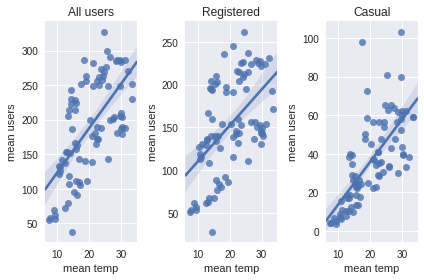

In [11]:
weekly = data.resample('w').mean().dropna()
fig5 = plt.figure()
ax1 = fig5.add_subplot(1,3,1)
ax1 = sns.regplot(weekly['temp'], weekly['count'])
ax1.set_xlabel('mean temp')
ax1.set_ylabel('mean users')
ax1.set_title('All users')
ax2 = fig5.add_subplot(1,3,2)
ax2 = sns.regplot(weekly['temp'], weekly['registered'])
ax2.set_xlabel('mean temp')
ax2.set_ylabel('mean users')
ax2.set_title('Registered')
ax3 = fig5.add_subplot(1,3,3)
ax3 = sns.regplot(weekly['temp'], weekly['casual'])
ax3.set_xlabel('mean temp')
ax3.set_ylabel('mean users')
ax3.set_title('Casual')
plt.tight_layout()

OK, the correlation is clear to see although there is significant vertical scatter, especially on high temperature days. 

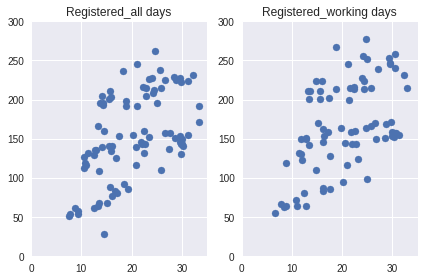

In [12]:
weekdays = data[data.index.dayofweek<5]
workingdays = weekdays[weekdays['holiday'] == 0].resample('w').mean().dropna()
fig6 = plt.figure()
ax1 = fig6.add_subplot(1,2,1)
ax1.scatter(weekly['temp'], weekly['registered'])
ax1.set_xlim([0,35])
ax1.set_ylim([0,300])
ax1.set_title('Registered_all days')
ax2 = fig6.add_subplot(1,2,2)
ax2.scatter(workingdays['temp'], workingdays['registered'])
ax2.set_xlim([0,35])
ax2.set_ylim([0,300])
ax2.set_title('Registered_working days')
plt.tight_layout()

I was checking if I could get this data to look 'cleaner' by removing the data for the weekends and holidays for registered users. While we manage to remove some of the 'outliers', there isn't really a big improvement. 

In [13]:
weekly2011 = weekly[weekly.index.year == 2011]
weekly2012 = weekly[weekly.index.year == 2012]

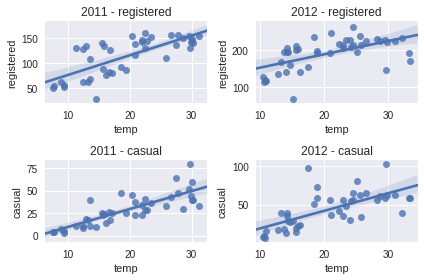

In [14]:
fig7 = plt.figure()
ax1 = fig7.add_subplot(2,2,1)
ax1 = sns.regplot(weekly2011['temp'], weekly2011['registered'])
ax1.set_title('2011 - registered')
ax2 = fig7.add_subplot(2,2,2)
ax2 = sns.regplot(weekly2012['temp'], weekly2012['registered'])
ax2.set_title('2012 - registered')
ax3 = fig7.add_subplot(2,2,3)
ax3 = sns.regplot(weekly2011['temp'], weekly2011['casual'])
ax3.set_title('2011 - casual')
ax4 = fig7.add_subplot(2,2,4)
ax4 = sns.regplot(x = weekly2012['temp'], y = weekly2012['casual'])
ax4.set_title('2012 - casual')
plt.tight_layout()

So, when we split the data by year, our spread gets smaller. This is understandable as there were far more users in 2012 than there were in 2011. 

In [15]:
data.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


This just shows us the correlation between variables. We see for instance that casual user number has a stronger positive correlation to temperature as compared to registered users. 

The plan from here on is to build two separate models, one based on simple linear regression and another on random forests and see how they perform. 

In [16]:
data2012 = data[data.index.year == 2012]
data2011 = data[data.index.year == 2011]

In [17]:
data2011.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.047625,-0.020374,-0.020890,0.293761,0.306060,0.199296,-0.171031,0.139547,0.227448,0.227113
holiday,0.047625,1.000000,-0.241914,0.029408,0.003828,-0.003093,0.001779,-0.018954,0.083402,-0.017273,0.010643
workingday,-0.020374,-0.241914,1.000000,0.023329,0.034937,0.033187,-0.023743,-0.008550,-0.336007,0.115006,-0.005793
weather,-0.020890,0.029408,0.023329,1.000000,-0.046630,-0.047620,0.401915,0.040354,-0.126913,-0.118076,-0.134063
temp,0.293761,0.003828,0.034937,-0.046630,1.000000,0.992281,-0.044342,0.004048,0.498356,0.370767,0.450592
atemp,0.306060,-0.003093,0.033187,-0.047620,0.992281,1.000000,-0.023609,-0.039005,0.496926,0.368365,0.448206
humidity,0.199296,0.001779,-0.023743,0.401915,-0.044342,-0.023609,1.000000,-0.293854,-0.280382,-0.243601,-0.282089
windspeed,-0.171031,-0.018954,-0.008550,0.040354,0.004048,-0.039005,-0.293854,1.000000,0.075792,0.073080,0.082157
casual,0.139547,0.083402,-0.336007,-0.126913,0.498356,0.496926,-0.280382,0.075792,1.000000,0.506306,0.710098
registered,0.227448,-0.017273,0.115006,-0.118076,0.370767,0.368365,-0.243601,0.073080,0.506306,1.000000,0.966713


In [18]:
def add_time_data(df):
    df['year'] = df.index.year
    df['month'] = df.index.month
    df['dayofweek'] = df.index.dayofweek
    df['hour'] = df.index.hour

In [19]:
add_time_data(data)
data.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,dayofweek,hour
datetime,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,5,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,5,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,5,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,5,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,5,4


In [20]:
X_data = data.drop(['casual', 'registered', 'count'], axis = 1)
X_data.shape
X_data.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,dayofweek,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,2011,1,5,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,2011,1,5,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,2011,1,5,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,2011,1,5,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,2011,1,5,4


In [21]:
y_data = data['registered']
y_data.shape

(10886,)

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import metrics

In [23]:
forest = RandomForestClassifier(n_estimators = 100)
forest.fit(X_data, y_data)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [24]:
test_data = pd.read_csv("../input/test.csv", index_col = 'datetime', parse_dates = True)

In [25]:
add_time_data(test_data)
test_data.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,dayofweek,hour
datetime,,,,,,,,,,,,
2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,3,0
2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3,1
2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3,2
2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,3,3
2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,3,4


I start having trouble with memory limitation on the Kaggle backend from here on. This will have to be continued on my PC. Will update the notebook on github soon. 